In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import morphology
import os
%matplotlib inline

## Select your Keras backend by uncommenting the correct line

In [2]:
#os.environ["KERAS_BACKEND"] =  "plaidml.keras.backend"
os.environ["KERAS_BACKEND"] =  "tensorflow"
#os.environ["KERAS_BACKEND"] =  "cntk"
from unet_nuclei import *

In [3]:
folder = "testimages"
files = os.listdir(folder)

In [4]:
files = [os.path.join(folder,f) for f in files]
files

['testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s5_w1e5eb927f-3ab5-4a69-8519-9ef2efc50c6a_illum_corrected.tif',
 'testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s3_w15a461117-610d-4f0d-b73d-dcc5fa29b08d_illum_corrected.tif',
 'testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s7_w191720342-1123-40b5-b409-fc674f8b6dc4_illum_corrected.tif',
 'testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s3_w10e6da511-41b5-4ab7-bf9d-c7981cc7e8ad_illum_corrected.tif',
 'testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s8_w156dd6bda-5555-4abd-bd3e-b6668daac179_illum_corrected.tif',
 'testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s6_w12704abf6-2346-452a-a89c-0f3e874a8fe0_illum_corrected.tif',
 'testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s8_w1f92d9934-0a5b-452c-bd21-442e63da310f_illum_corrected.tif',
 'testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s9_w1138b8b88-5f26-4ab9-b609-67f6216429c9_illum_corrected.tif',
 'testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s9_w189ef153c-215e-4480-8c8d-ae2266010

Initialize the model. Note that we set `automated_shape_adjustment=True`, which initializes the model with the closest compatible shape to the desired input shape. 

In [5]:
model = unet_initialize((1024,1024), automated_shape_adjustment=True)

# if you are trying this without GPU (e.g. with a tensorflow build for CPU)
# set this to a smaller size
# model = unet_initialize((128,128), automated_shape_adjustment=True)

Check which size was actually chosen:

In [6]:
# model shape
model.input_shape

(None, 1024, 1024, 1)

Define a function to process an image. Beware of the hard coded crop on loading ... Again this is simply to demonstrate the automated rescaling of the image to the model and of the classification result to the image shape.

In [7]:
import skimage.morphology
def process_img(im):
    fig, ax = plt.subplots(1,2, figsize=[20,40])
    im = imread(im)[:1024,:1024]
    ax[0].imshow(im)
    prediction = unet_classify(model, im)
    prediction = np.argmax(prediction * [1, 1, 2], -1) == 1
    prediction = morphology.remove_small_holes(prediction, 16)
    prediction = morphology.remove_small_objects(prediction, 100)
    ax[1].imshow(skimage.measure.label(prediction))
    plt.show()

testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s5_w1e5eb927f-3ab5-4a69-8519-9ef2efc50c6a_illum_corrected.tif


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/conv2d/Conv2D (defined at /usr/share/miniconda3/envs/unet/lib/python3.8/site-packages/unet_nuclei-0.0.1-py3.8.egg/unet_nuclei/classify_pixels_unet.py:124) ]] [Op:__inference_predict_function_1404]

Function call stack:
predict_function


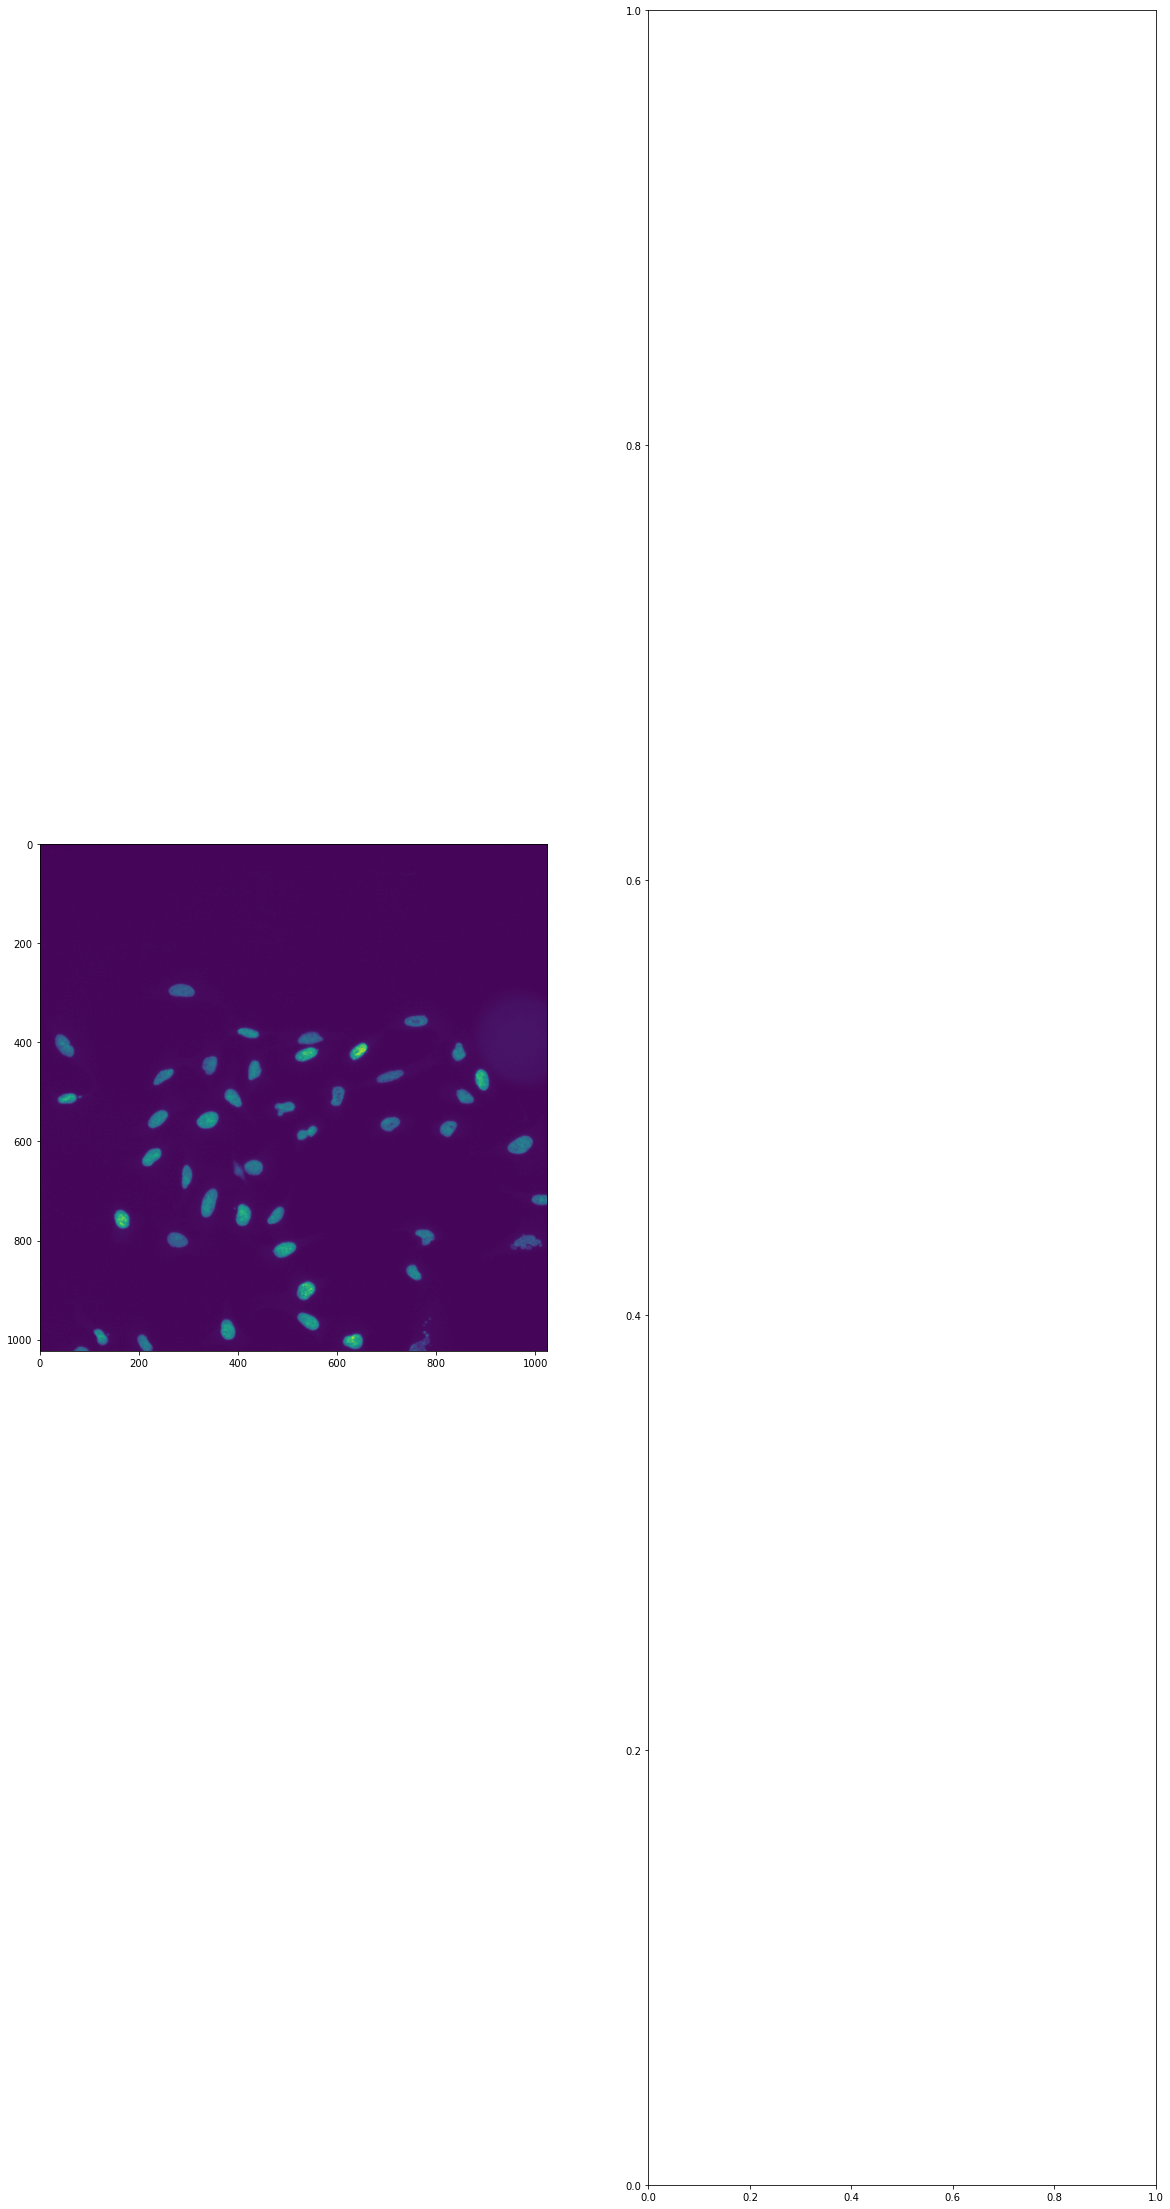

In [8]:
# note that the first file takes longer
for f in files:
    print(f)
    process_img(f)

testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s5_w1e5eb927f-3ab5-4a69-8519-9ef2efc50c6a_illum_corrected.tif


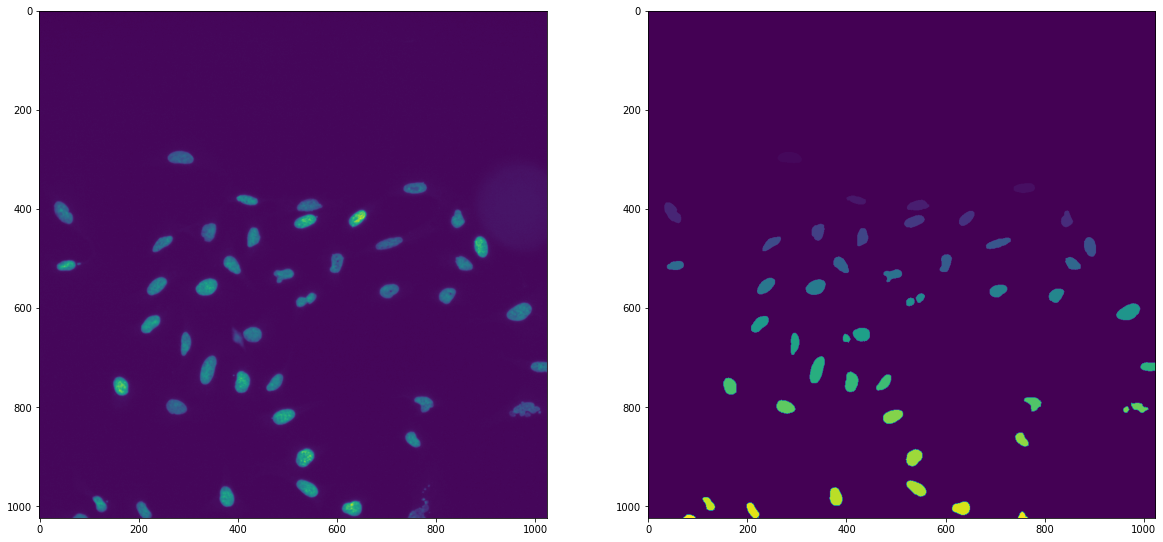

testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s3_w15a461117-610d-4f0d-b73d-dcc5fa29b08d_illum_corrected.tif


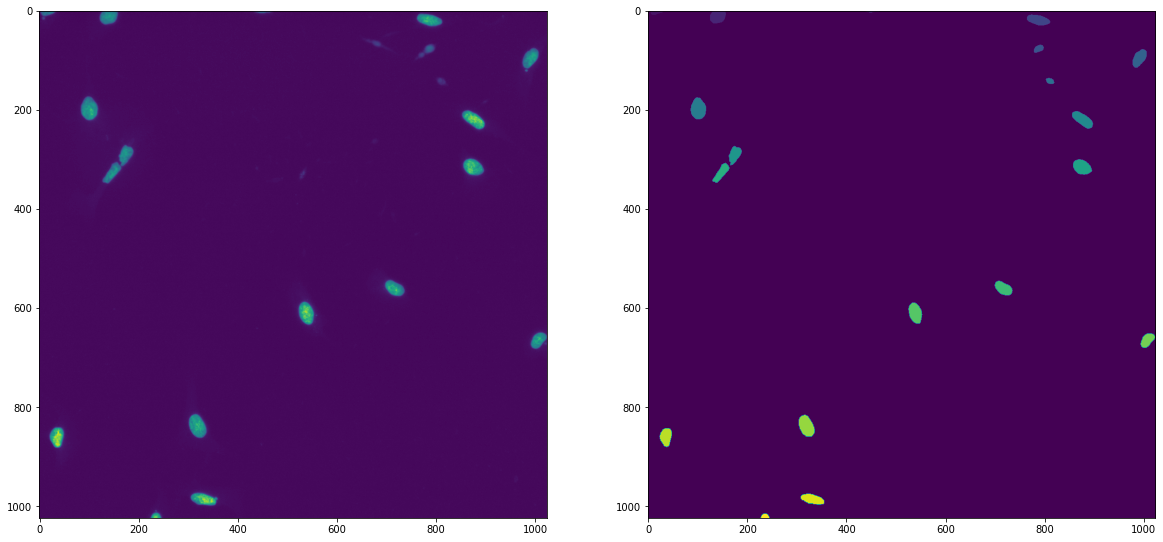

testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s7_w191720342-1123-40b5-b409-fc674f8b6dc4_illum_corrected.tif


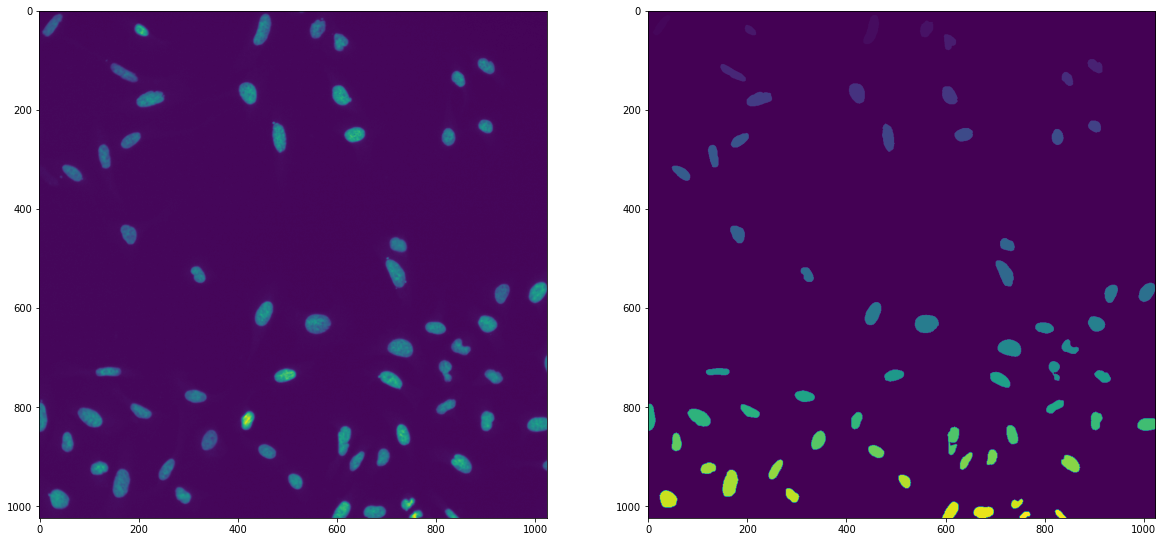

testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s3_w10e6da511-41b5-4ab7-bf9d-c7981cc7e8ad_illum_corrected.tif


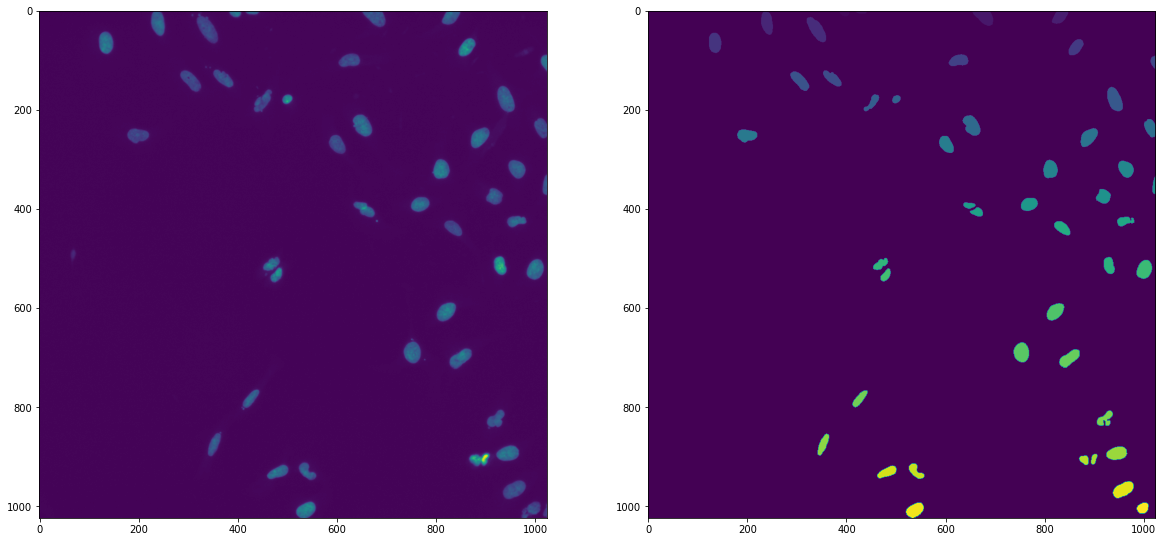

testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s8_w156dd6bda-5555-4abd-bd3e-b6668daac179_illum_corrected.tif


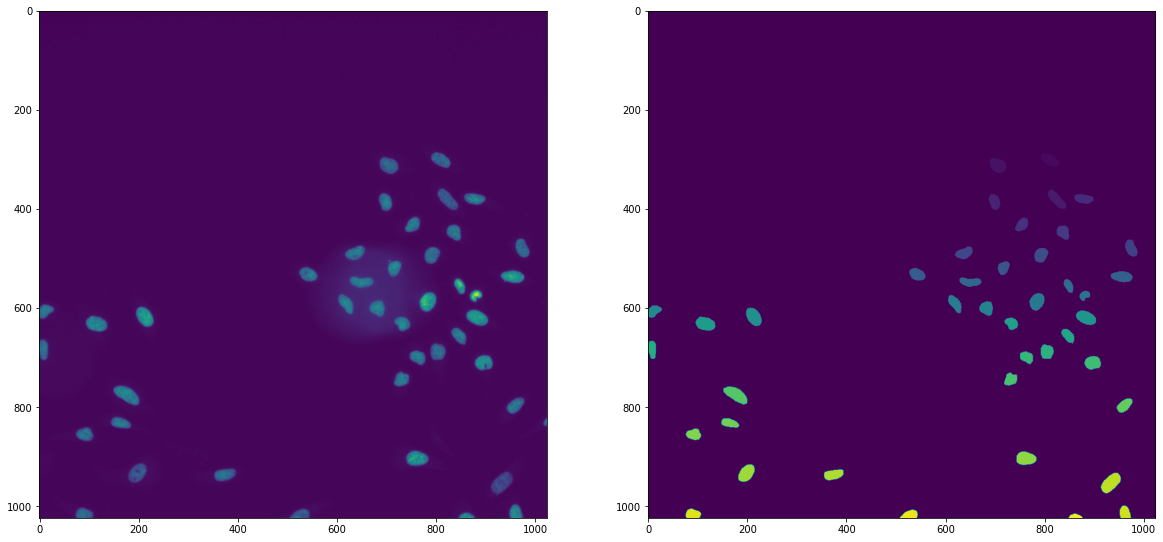

testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s6_w12704abf6-2346-452a-a89c-0f3e874a8fe0_illum_corrected.tif


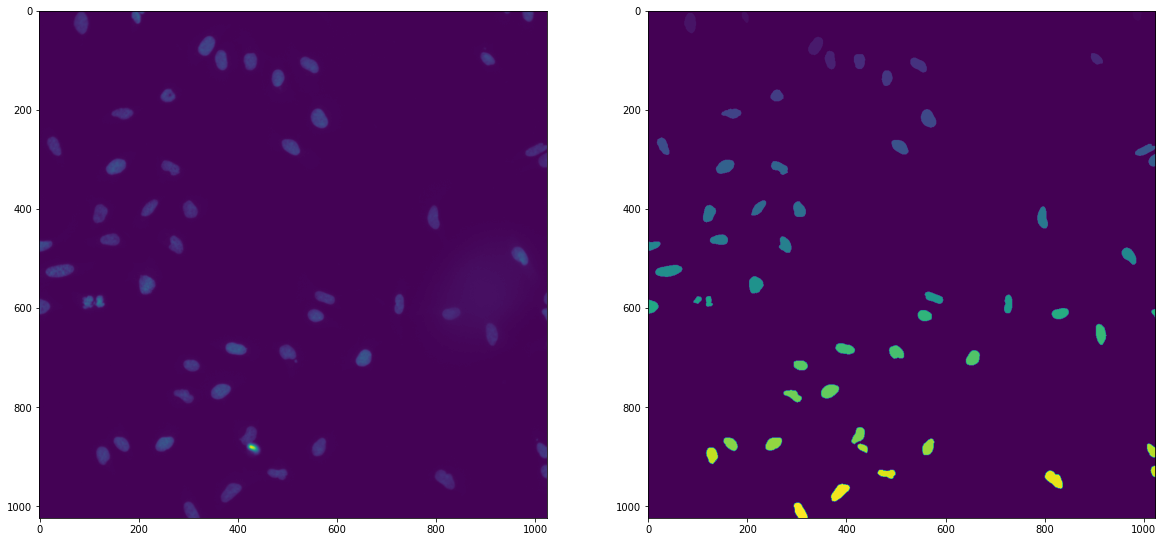

testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s8_w1f92d9934-0a5b-452c-bd21-442e63da310f_illum_corrected.tif


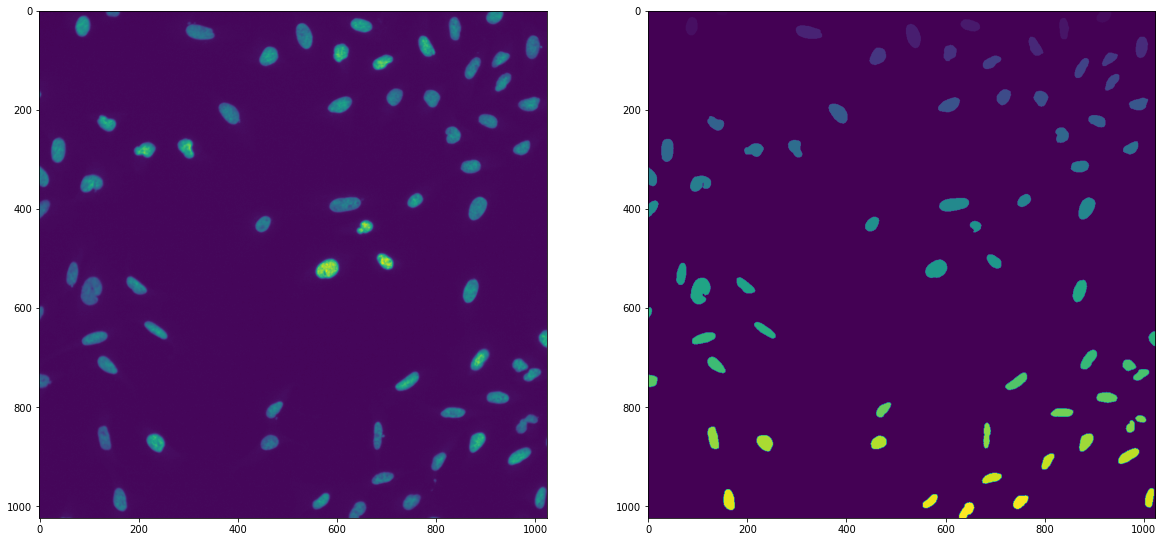

testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s9_w1138b8b88-5f26-4ab9-b609-67f6216429c9_illum_corrected.tif


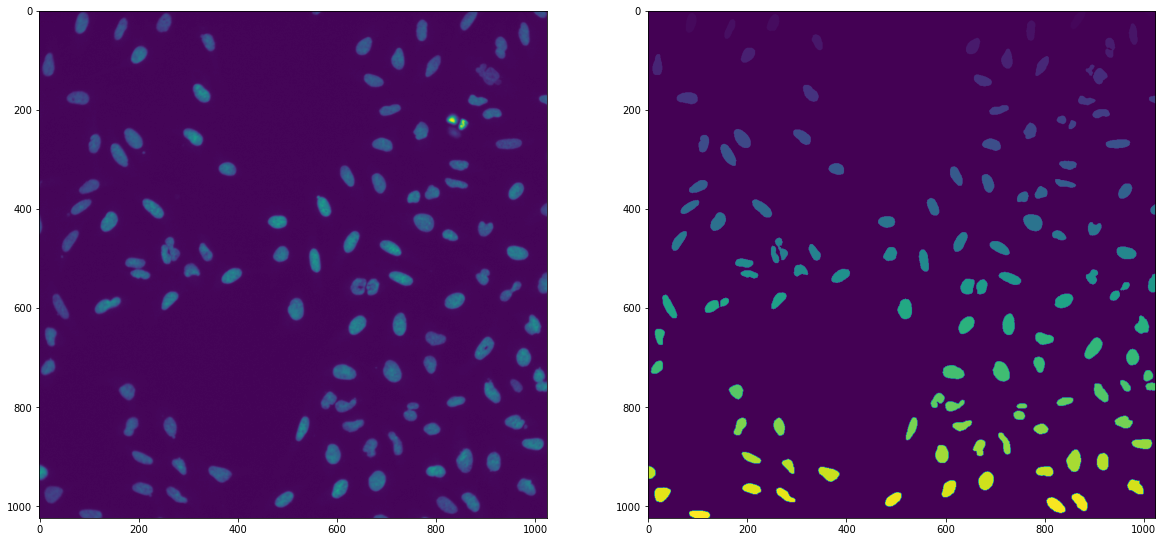

testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s9_w189ef153c-215e-4480-8c8d-ae2266010117_illum_corrected.tif


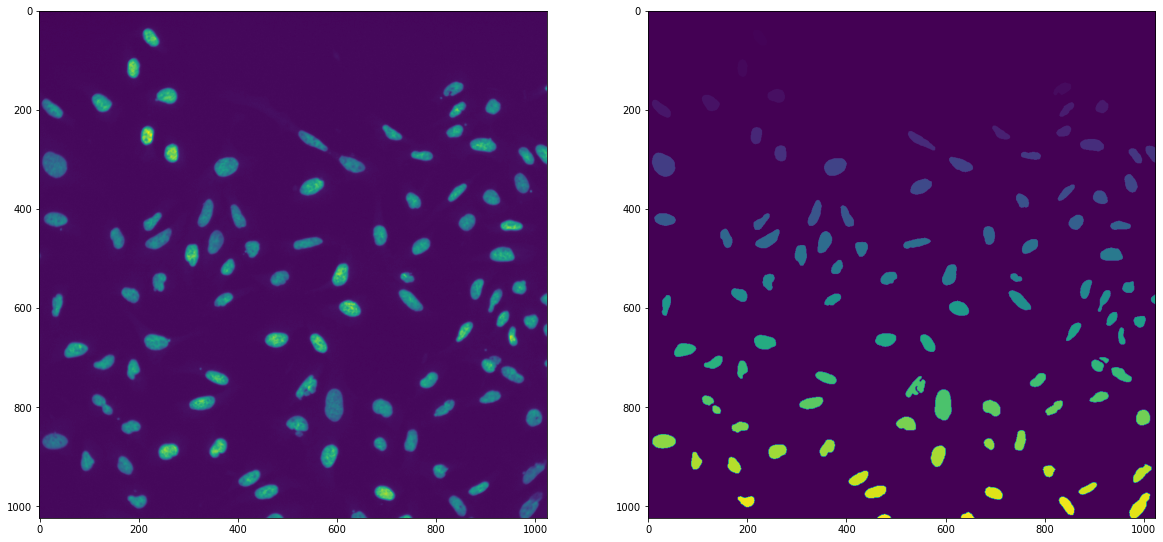

testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s8_w173964d73-202b-4b13-b57e-7e0a32683a6d_illum_corrected.tif


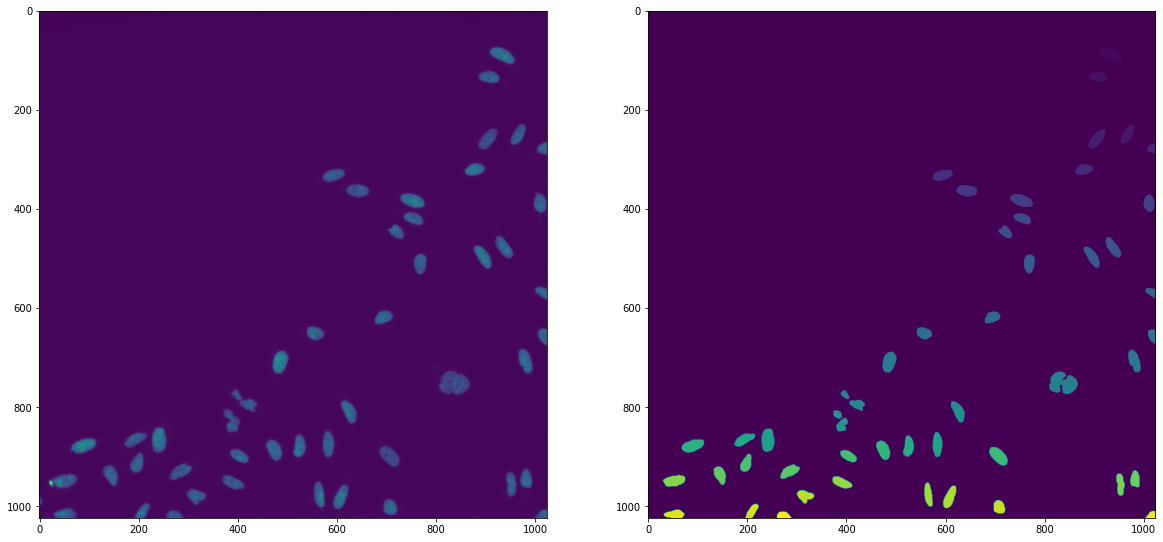

testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s1_w10904a528-0fe2-44f6-a3ab-ae3fe41a25cf_illum_corrected.tif


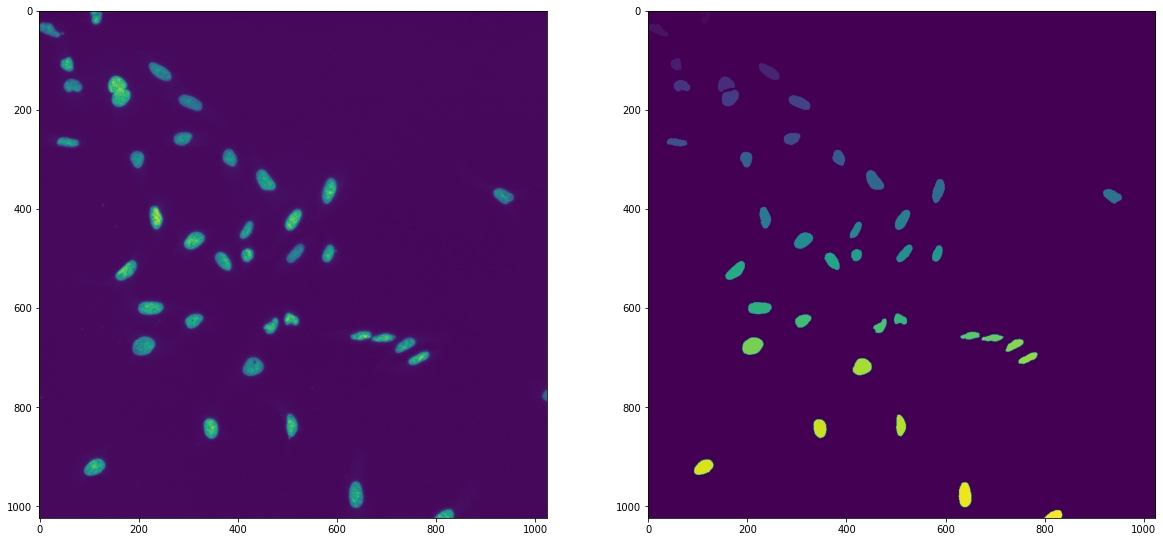

testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s2_w1633c2b5f-d717-46d7-84bb-85a21106bd56_illum_corrected.tif


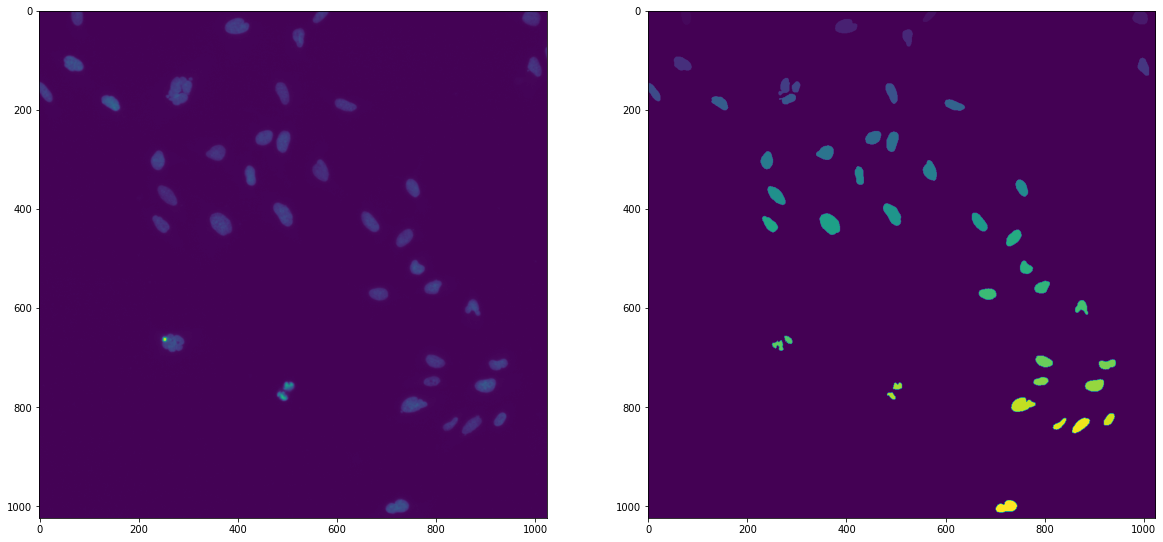

testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s5_w18ce695ff-6adb-41d3-b242-4eb98c252bae_illum_corrected.tif


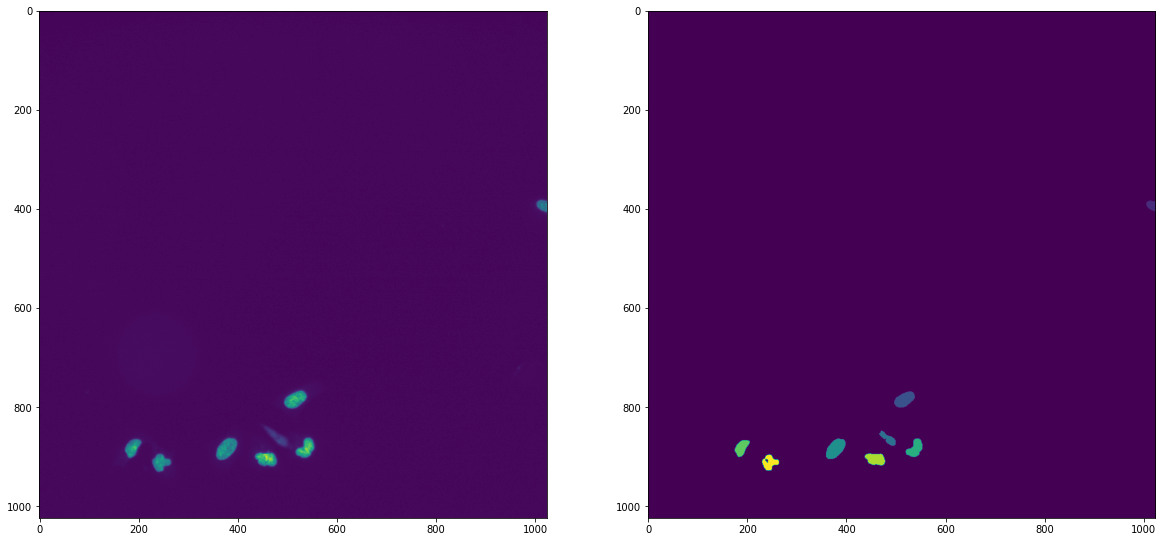

testimages/taoe005-u2os-72h-cp-a-au00044859_a02_s3_w102b6c1c5-2177-47b5-8862-1e0fa4d8d1aa_illum_corrected.tif


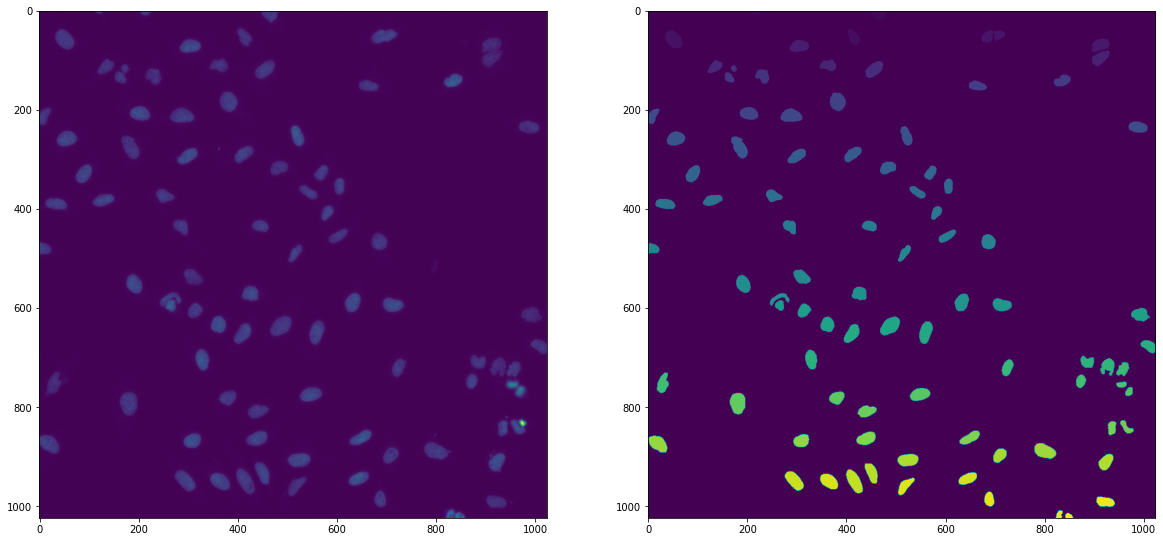

testimages/taoe005-u2os-72h-cp-a-au00044859_a02_s5_w1035cbea7-8d6a-45c0-839b-edbc72ab44df_illum_corrected.tif


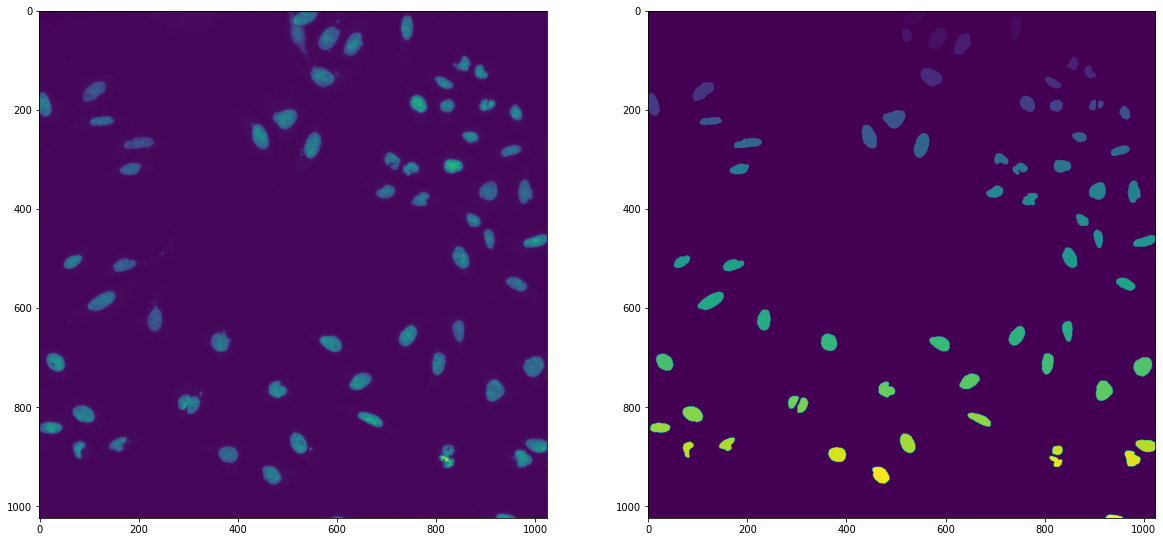

testimages/taoe005-u2os-72h-cp-a-au00044859_a02_s6_w161a0577e-52ca-43bd-991e-da2e5f96393d_illum_corrected.tif


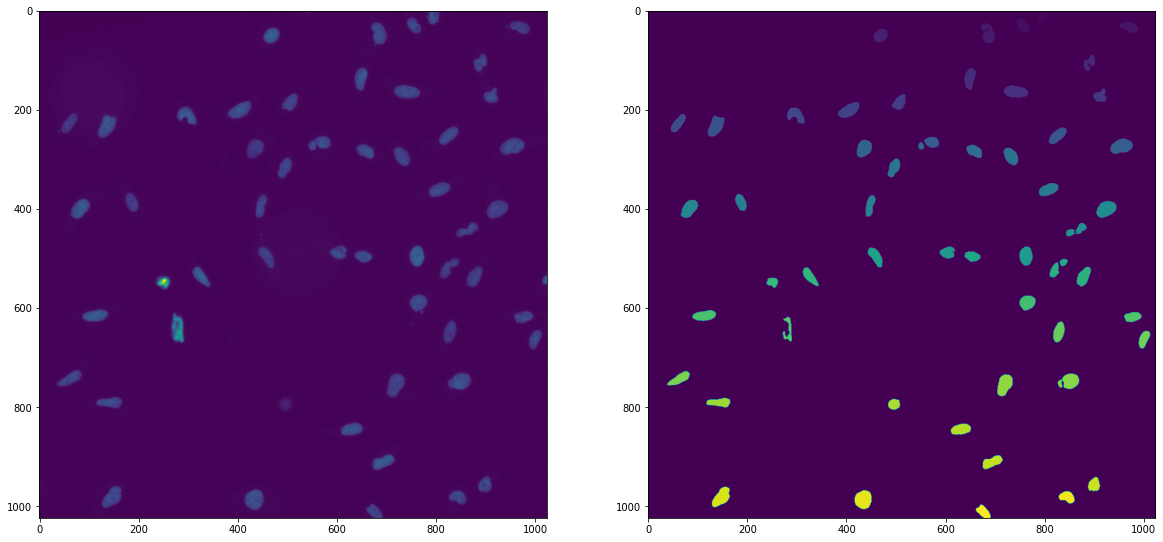

testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s2_w150bed2db-b641-4dac-8ec3-6398ec116a0d_illum_corrected.tif


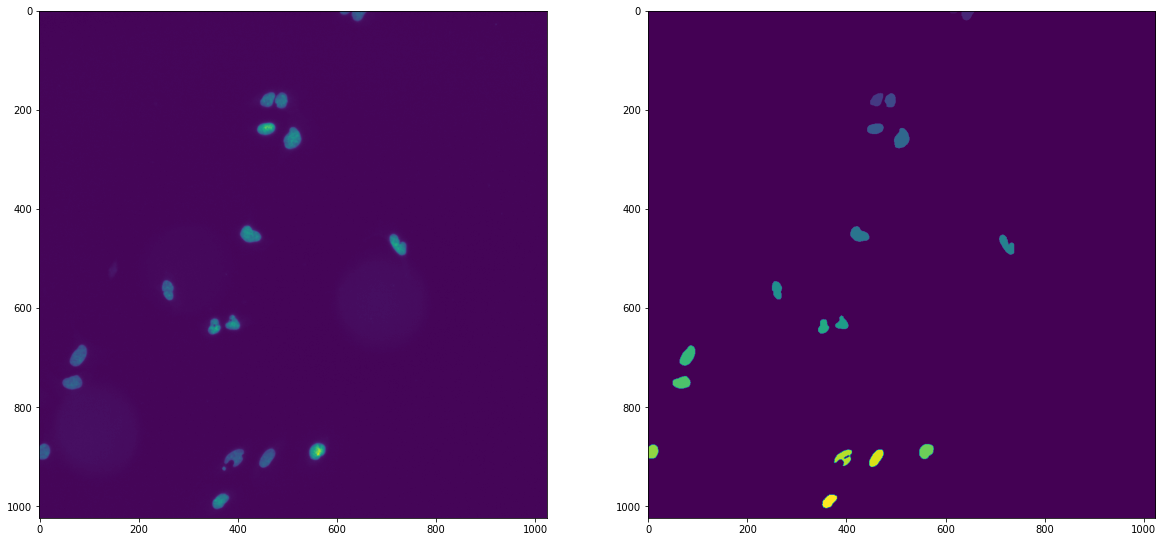

testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s4_w1623cd1c2-adb6-4779-94e0-290ffe6afaa0_illum_corrected.tif


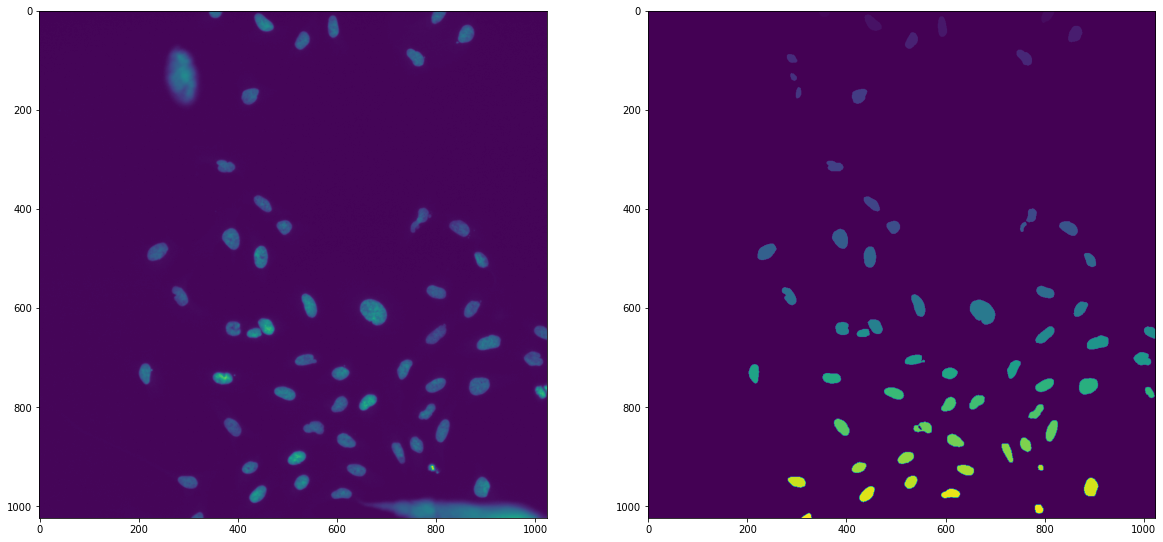

testimages/taoe005-u2os-72h-cp-a-au00044859_a02_s4_w11c0e46ac-9e19-463f-97b1-80e712e820b6_illum_corrected.tif


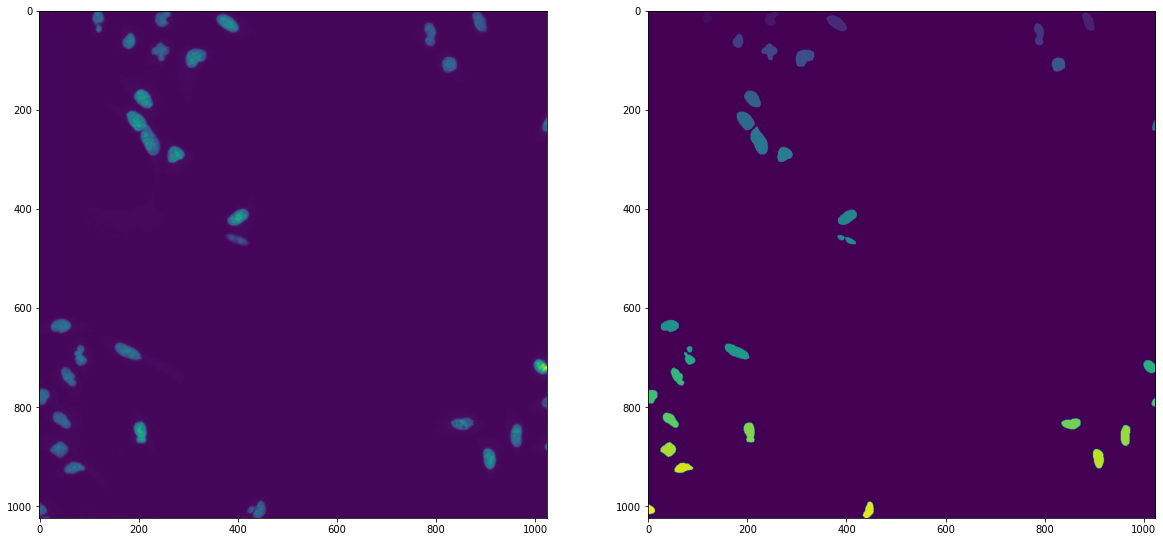

testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s2_w120ef055e-86ef-410f-9d7e-705f682cc370_illum_corrected.tif


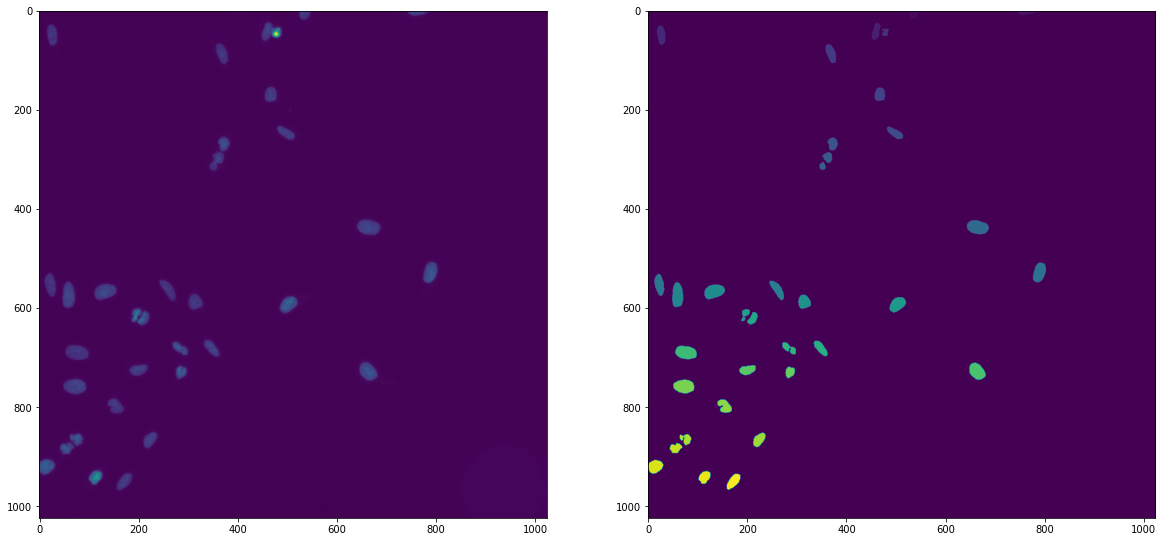

testimages/taoe005-u2os-72h-cp-a-au00044859_a02_s1_w1c72f76c4-cf34-4aa7-8427-39aadb51cf6a_illum_corrected.tif


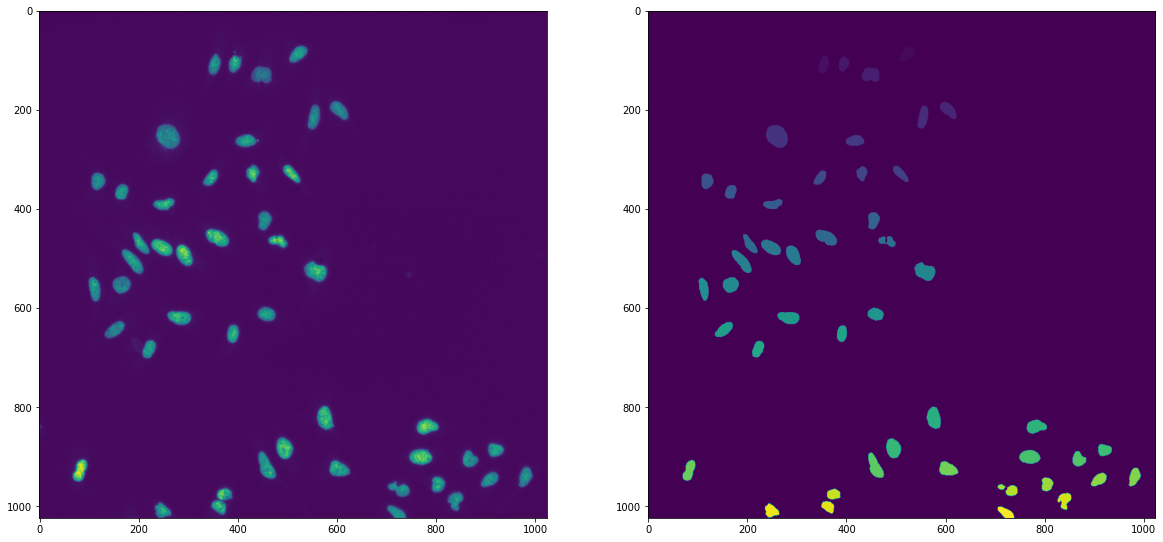

testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s6_w17b0f54ce-1723-4f03-a5ff-651fca10126d_illum_corrected.tif


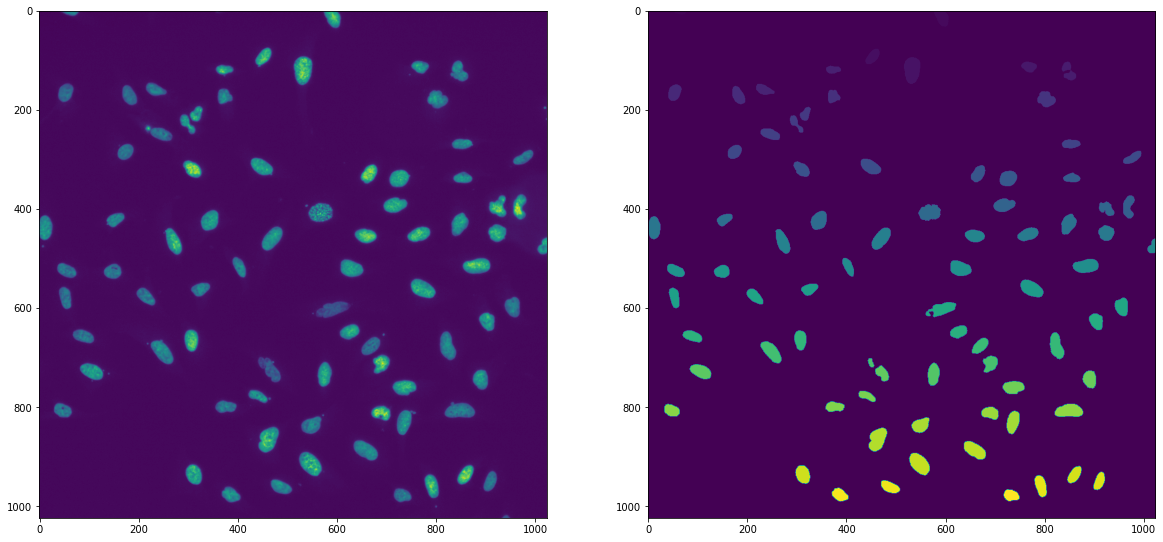

testimages/taoe005-u2os-72h-cp-a-au00044859_a02_s9_w1ee6cd1b1-6727-4ddf-9486-7f654e5bc3c1_illum_corrected.tif


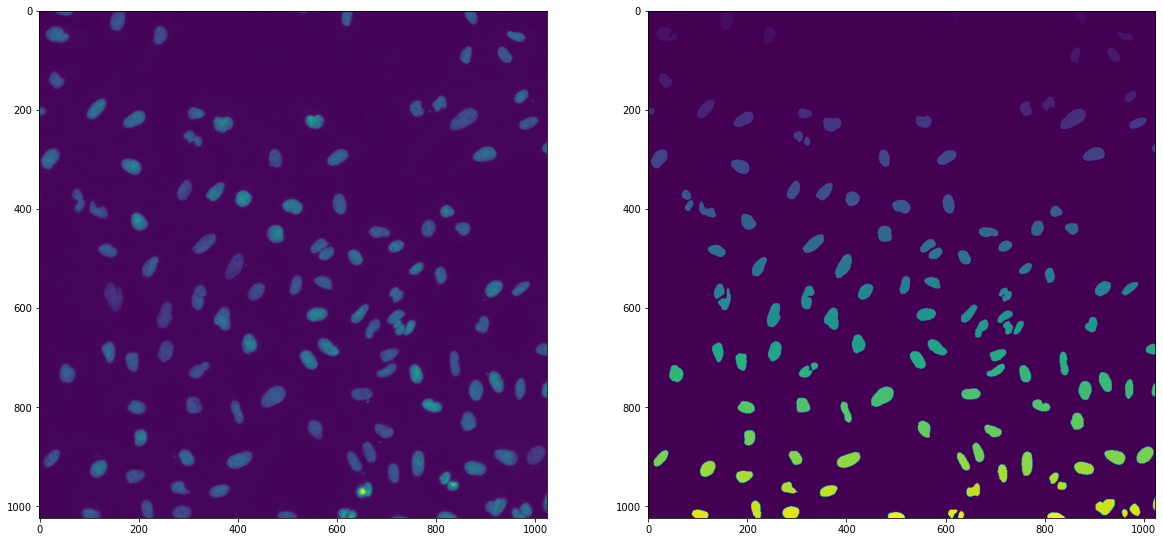

testimages/taoe005-u2os-72h-cp-a-au00044859_a02_s8_w181cb9de9-6921-45df-b2e2-0638b7c4bb59_illum_corrected.tif


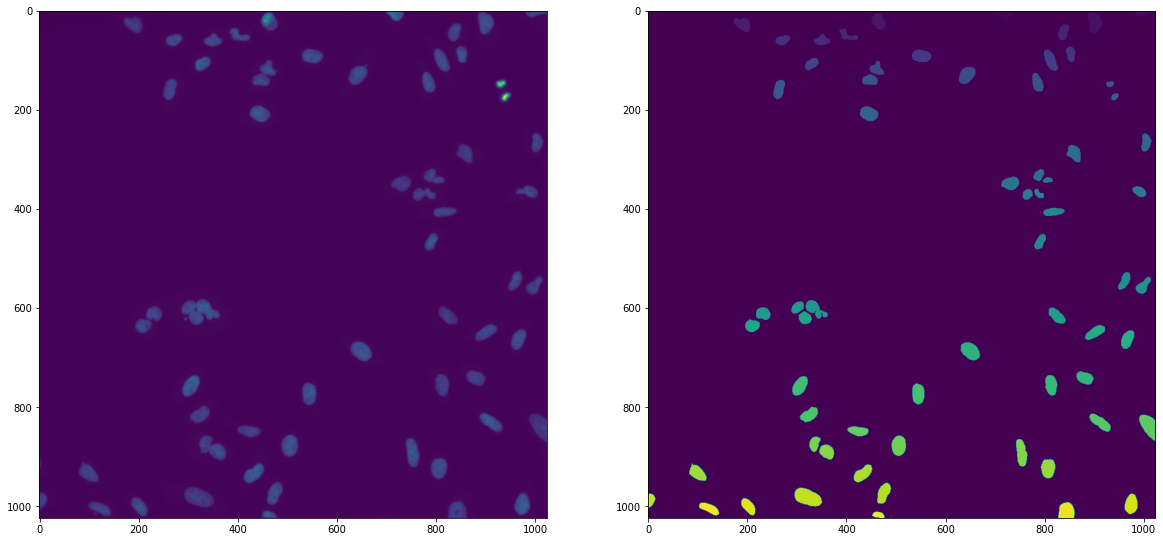

testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s1_w1506fb051-c2ad-45db-8a52-674278937a31_illum_corrected.tif


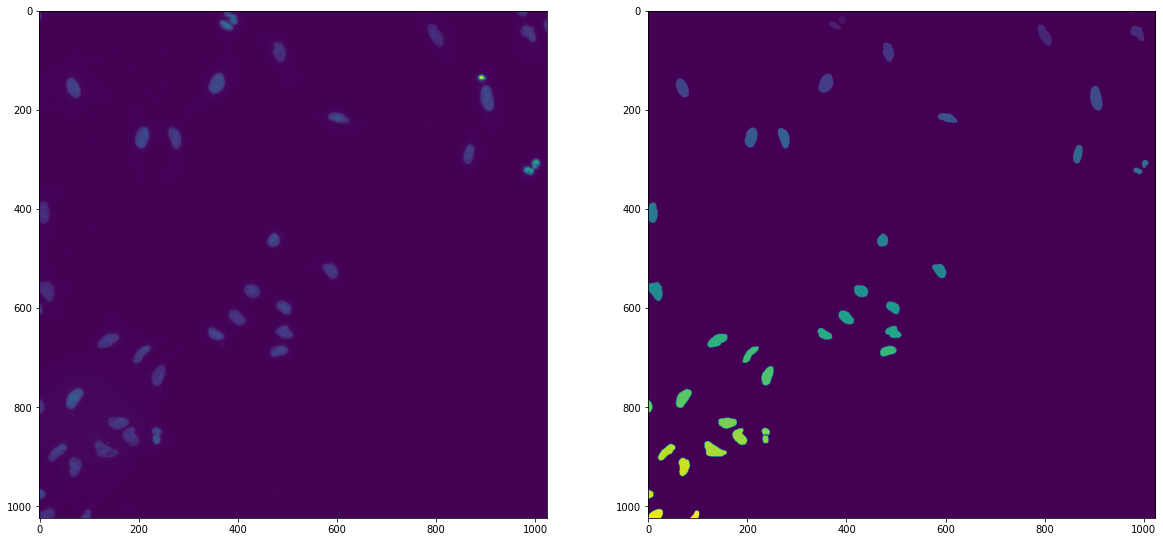

testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s4_w1efc345c8-a5a4-4291-a156-a3d28f846b19_illum_corrected.tif


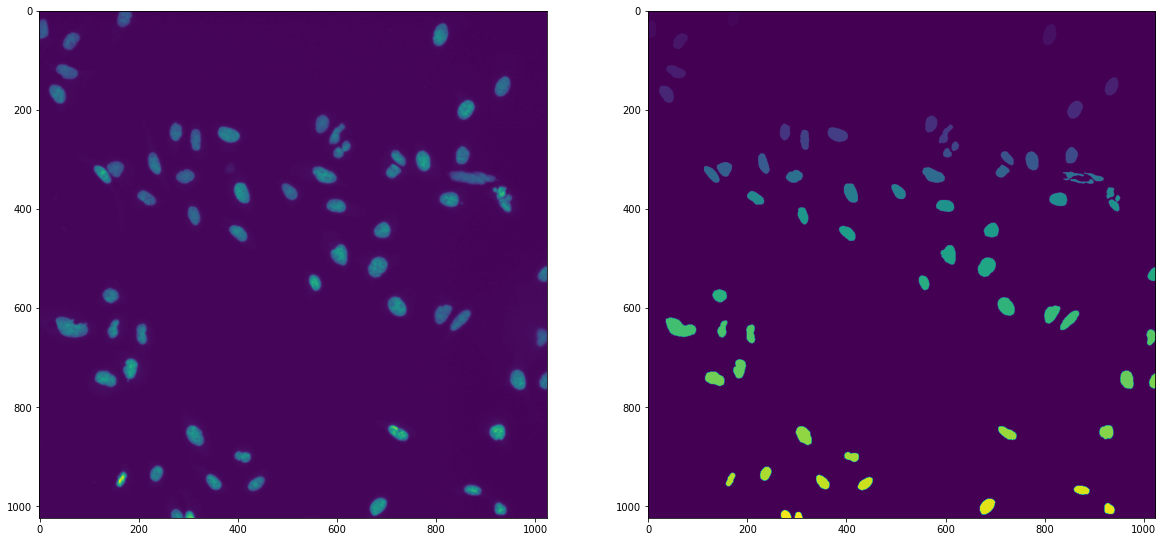

testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s1_w18a3232ef-5e83-43c7-9993-0e1f02b1240b_illum_corrected.tif


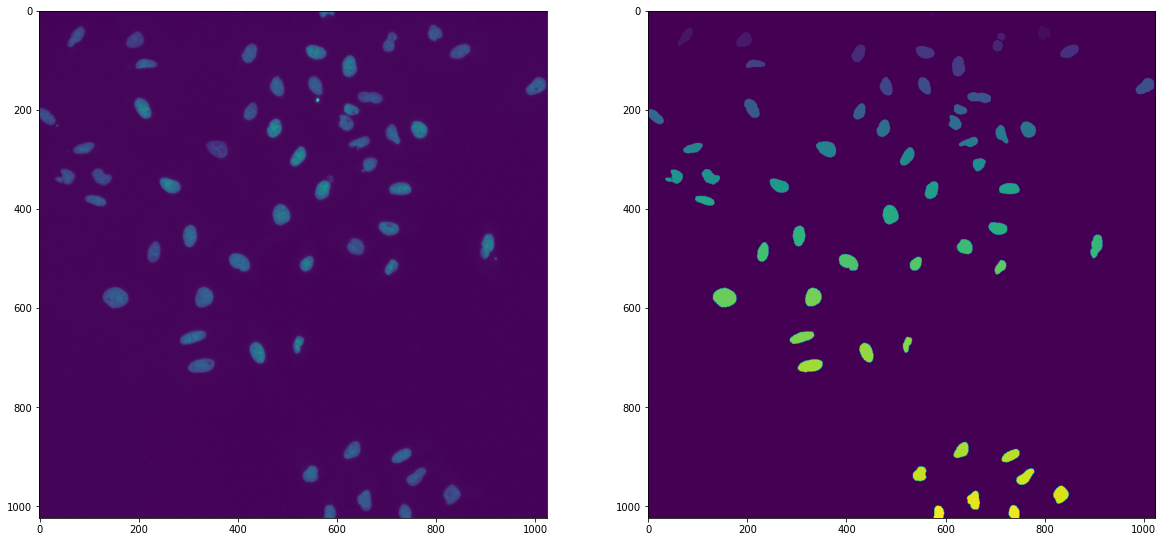

testimages/taoe005-u2os-72h-cp-a-au00044859_a02_s2_w12e170a08-93aa-40da-952f-2961db2bf2c7_illum_corrected.tif


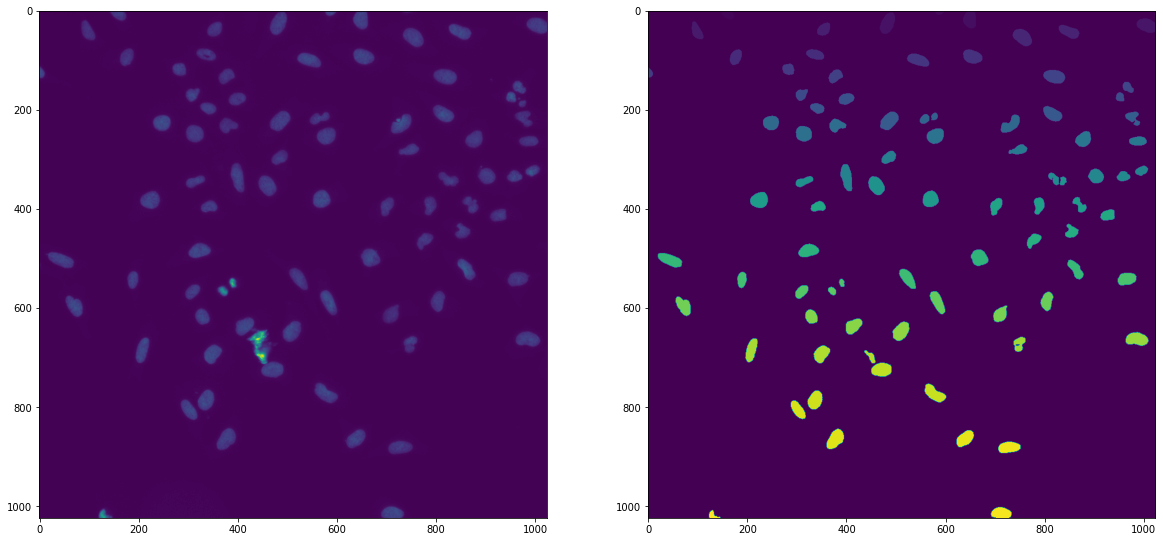

testimages/taoe005-u2os-72h-cp-a-au00044859_a04_s7_w14f183bcd-1a28-418a-b4fc-46aac9b08ca2_illum_corrected.tif


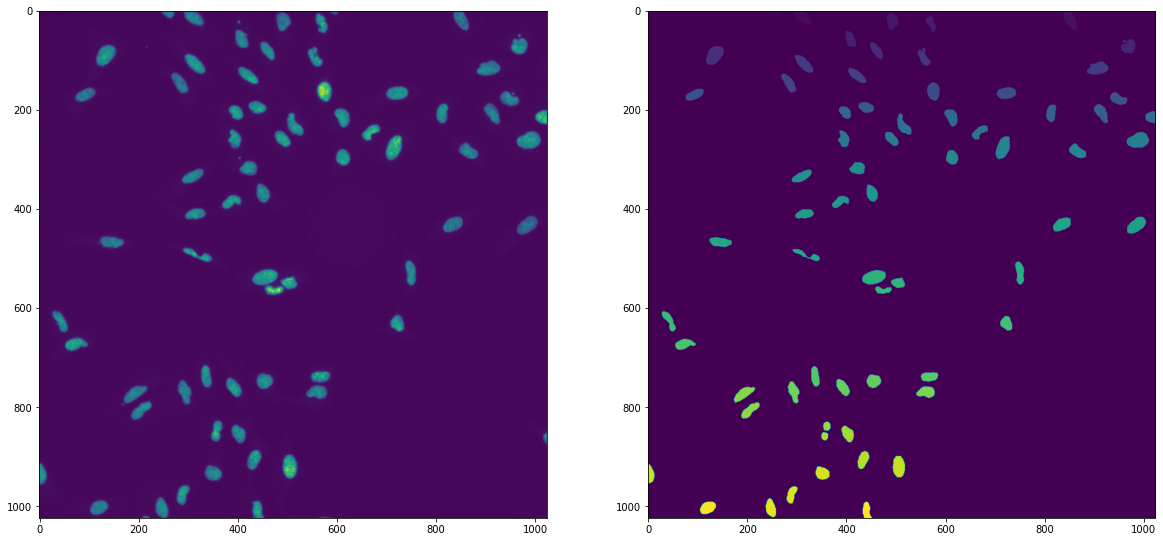

testimages/taoe005-u2os-72h-cp-a-au00044859_a02_s7_w144c12564-77c6-4b5e-b025-9d1f51da572f_illum_corrected.tif


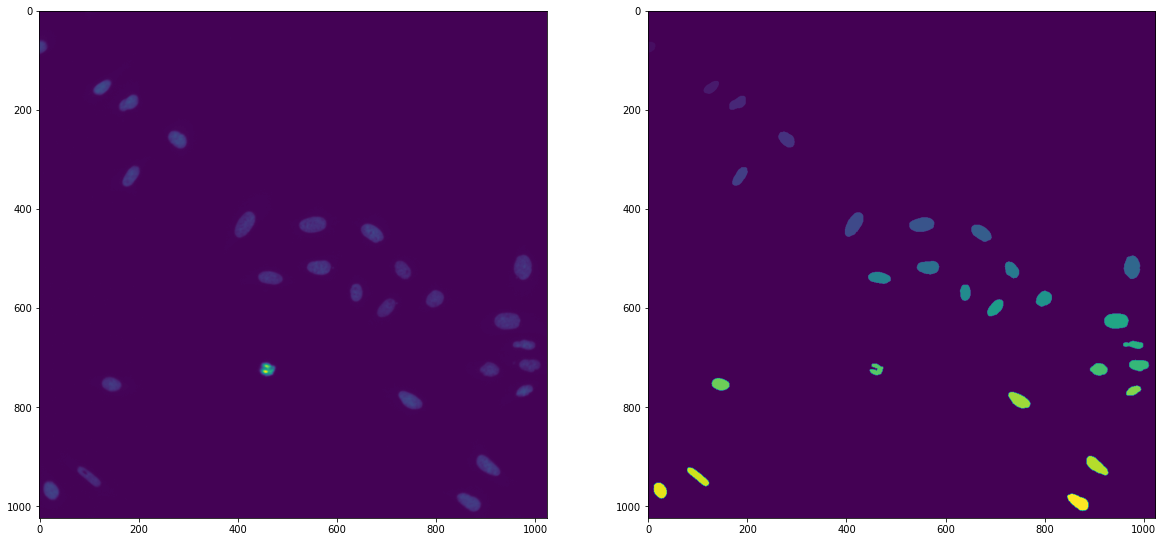

testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s6_w155c91689-6a97-40a5-afe1-01f8a4d1c869_illum_corrected.tif


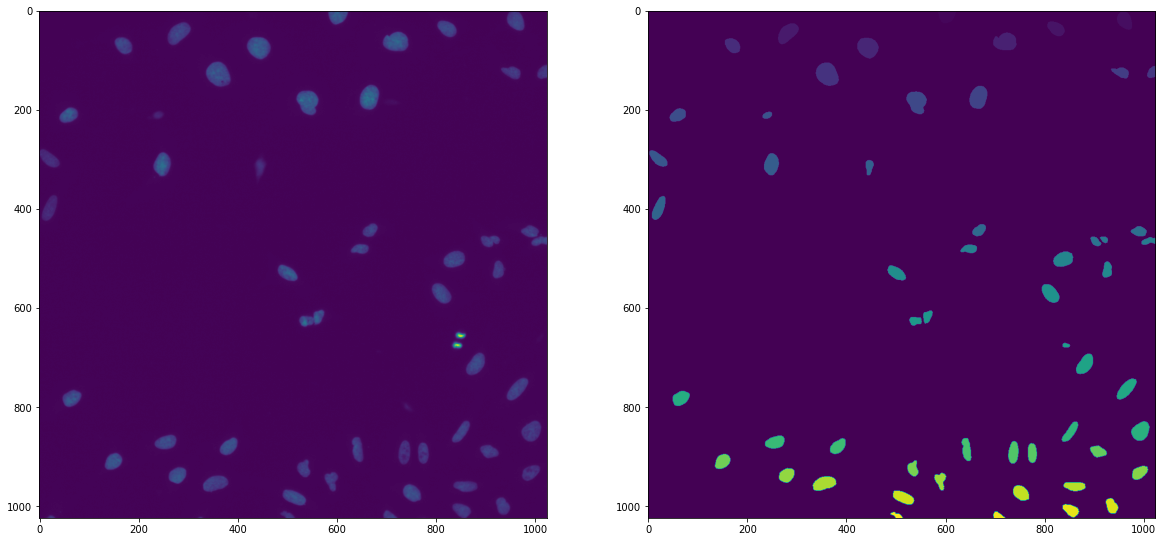

testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s3_w10459267e-14ca-4ef7-8171-53b26dad0f26_illum_corrected.tif


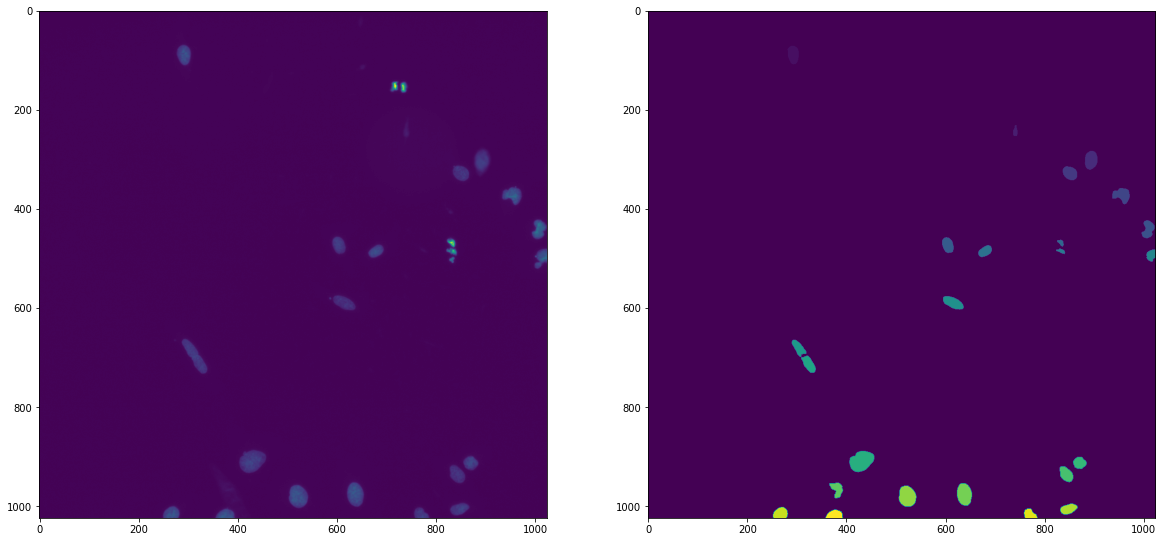

testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s4_w1ce96370f-d51d-4da2-98ed-f02194784eee_illum_corrected.tif


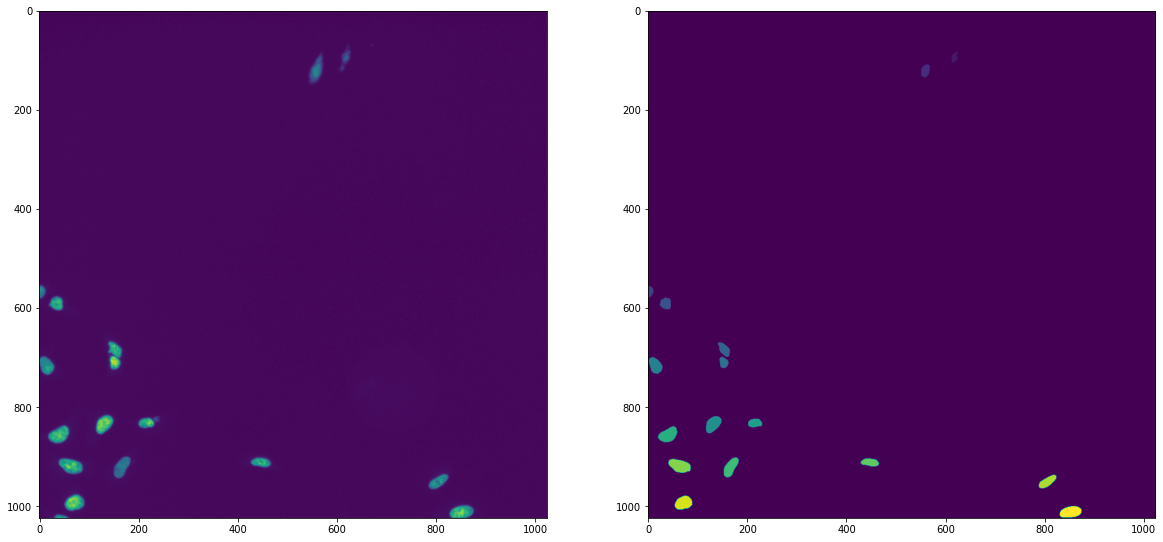

testimages/taoe005-u2os-72h-cp-a-au00044859_a01_s5_w19ac16e3a-1125-46be-9835-dac83f1af11f_illum_corrected.tif


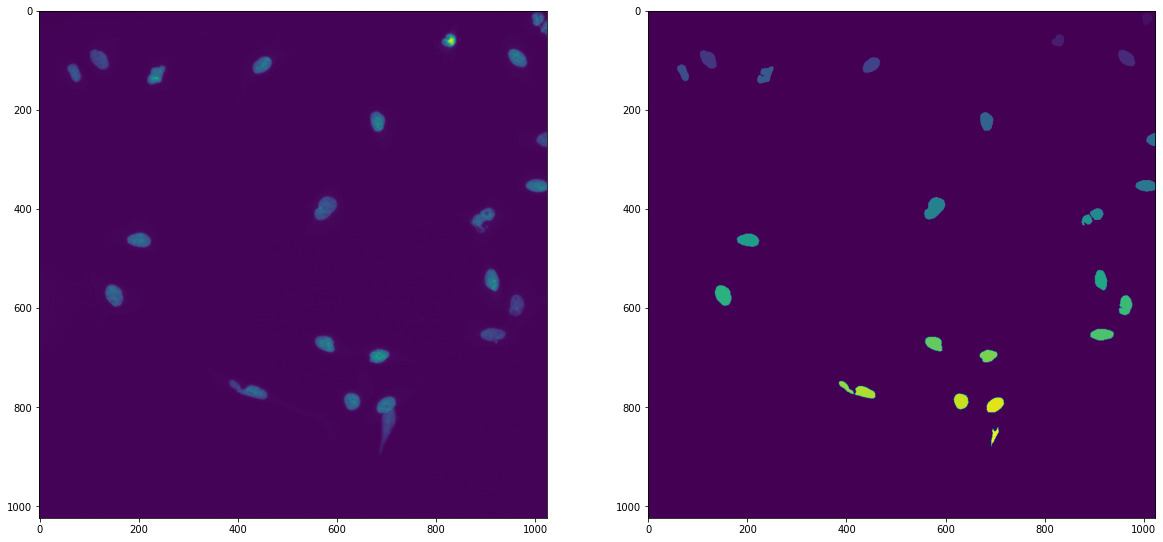

testimages/taoe005-u2os-72h-cp-a-au00044859_a03_s7_w1cee0b930-ccf3-40c1-b82d-d569b3179146_illum_corrected.tif


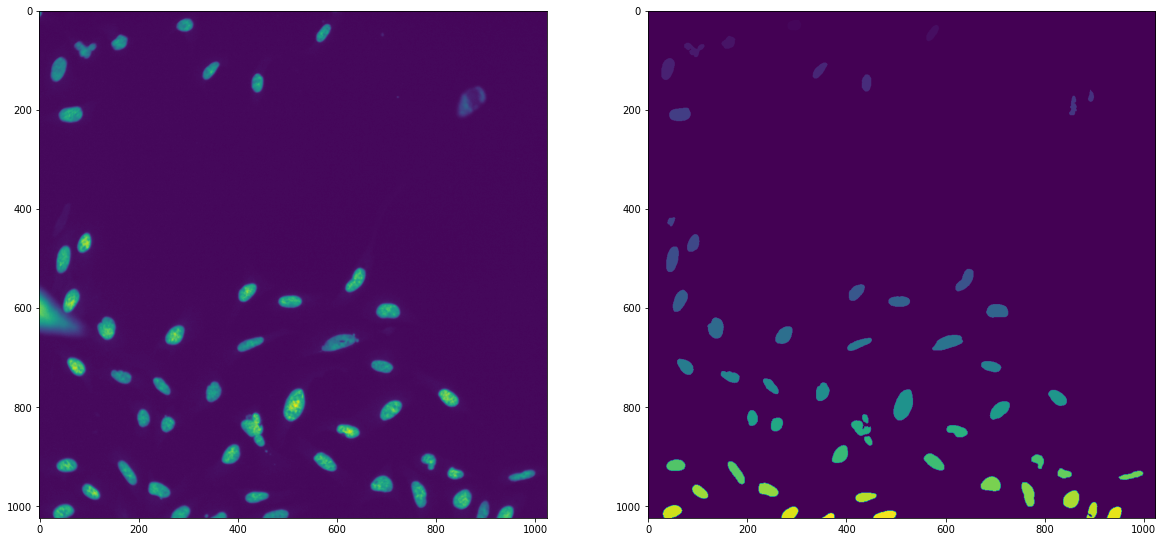

In [41]:
import skimage.morphology
def process_img(im):
    fig, ax = plt.subplots(1,2, figsize=[20,40])
    im = imread(im)[:1024,:1024]
    ax[0].imshow(im)
    prediction = unet_classify(model, im)
    prediction = np.argmax(prediction * [1, 1, 1], -1) == 1
    prediction = morphology.remove_small_holes(prediction, 16)
    prediction = morphology.remove_small_objects(prediction, 100)
    ax[1].imshow(skimage.measure.label(prediction))
    plt.show()

# note that the first file takes longer
for f in files:
    print(f)
    process_img(f)

### Resulting probability map
3-channel image, red channel is background class, blue channel is nuclear boundary mask and green channel is nuclei mask
